## "I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

In [4]:
import numpy as np
import gym 
import matplotlib.pyplot as plt
from gym import spaces
import random
import time
from IPython.display import clear_output

In [5]:
grid = np.zeros((5,5))
pos1 = (0,0)
pos2 = (4,4)
grid[tuple(pos1)] = 1.0
grid[tuple(pos2)] = 0.5

# Part I: Define an RL Environment 

In [6]:
class GridEnvironment(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 1000

    def reset(self):
        self.timestep = 0
        self.initial = [0,0]
        self.goal = [4,4]
        self.state = np.zeros((5,5))
        self.state[tuple(self.initial)] = 1
        self.state[tuple((1,1))] = 0.6
        self.state[tuple((2,2))] = 0.6
        self.state[tuple((3,3))] = 0.6
        self.state[tuple((0,4))] = 0.8
        self.state[tuple((4,0))] = 0.8
        self.state[tuple(self.goal)] = 0.5

        observation =self.state.flatten()

        return observation

    def step(self,action):
        self.state = np.random.choice(self.observation_space.n)
        if action == 0:
            self.initial[0] += 1
        if action == 1:
            self.initial[0] -= 1
        if action == 2:
            self.initial[1] += 1
        if action == 3:
            self.initial[1] -= 1
        self.initial = np.clip(self.initial,0, 4)
        self.state = np.zeros((5,5))
        self.state[tuple(self.initial)] = 1.0
        self.state[tuple(self.goal)] = 0.5
        
        observation = self.state.flatten()

        reward = -1
        if(self.initial == self.goal).all():
            reward = 100
        if(self.initial == (1,1)).all():
            reward = 10
        if(self.initial == (2,2)).all():
            reward = 15
        if(self.initial == (3,3)).all():
            reward = 5
        if(self.initial == (0,4)).all():
            reward = -5
        if(self.initial == (4,0)).all():
            reward = -10

        self.timestep += 1 
        done = True if (self.timestep >= self.max_timesteps or (self.initial == self.goal).all()) else False 

        info = {}

        return observation, reward, done, info

    def render(self):
        plt.imshow(self.state)

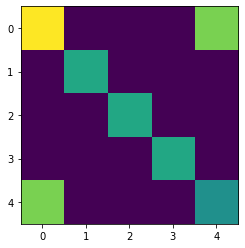

In [14]:
env = GridEnvironment()
obs = env.reset()
env.render()

# Part II: Solve your environment using a tabular method – SARSA

### Hyperparameters: No of Episodes = 50, Epsilon Decay Rate = 0.9999

In [15]:
performance_list = list()
reward_per_episode_list = list()
epsilon_arr_list = list()

True 50


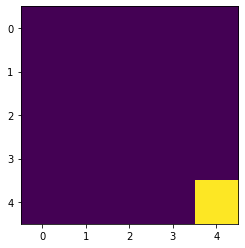

Total Rewards -  724
Performance - Total Rewards/Number of Episodes 14.48


In [16]:
qvalues = np.zeros((5,5,4))
episodes = 50
episode_count = 0;
epsilon = 0.9
discount_factor = 0.9
learning_rate = 0.01
decay = 0.9999
min_epsilon = 0.1

def greedy(cur_row, cur_col, epsilon):
    if np.random.random() < epsilon:
        return np.argmax(qvalues[cur_row, cur_col])
    else:
        return np.random.randint(4)

final_reward = 0
epsilon_arr = list()
reward_per_episode = list()
performance = list()

done = False
reward = 0 

for e in range(episodes):    
    env.reset()
    row, col = [0,0]
    total_rewards = 0
    while (done == False or env.timestep < env.max_timesteps):
        clear_output(wait=True)
        env.render()
        print(done, e)
        plt.show()
        time.sleep(0.01)

        old_action = greedy(row, col, epsilon)
        old_row, old_col = row, col
        new_row, new_col = env.initial
        next_state, reward, done, _ = env.step(old_action)
        new_action = greedy(new_row, new_col, epsilon)

        new_q = qvalues[old_row, old_col, old_action] + learning_rate * (reward + (discount_factor * qvalues[new_row, new_col, new_action]) - qvalues[old_row, old_col, old_action])
        qvalues[old_row, old_col, old_action] = new_q
        
        if done:
            epsilon = max(min_epsilon, epsilon * decay)
            epsilon_arr.append(epsilon)
            break
        row, col = new_row, new_col
        total_rewards += reward

    episode_count += 1
    final_reward += total_rewards
    reward_per_episode.append(total_rewards)
    performance.append(final_reward)
    
clear_output(wait=True)
env.render()
print(done, episodes)
plt.show()
print("Total Rewards - ", final_reward)
print("Performance - Total Rewards/Number of Episodes",(final_reward/episodes))

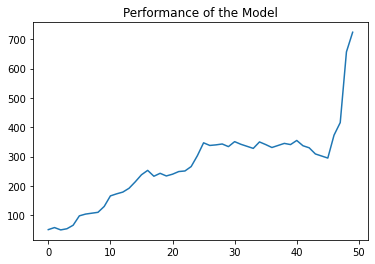

In [17]:
plt.plot(performance) 
plt.title('Performance of the Model')
plt.show()

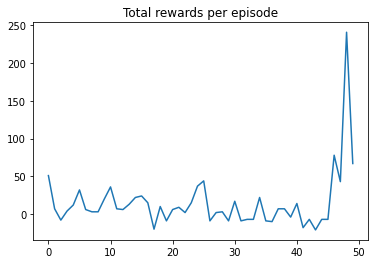

In [18]:
plt.plot(reward_per_episode) 
plt.title('Total rewards per episode')
plt.show()

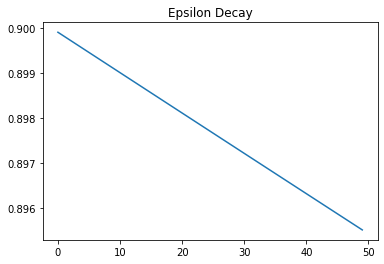

In [19]:
plt.plot(epsilon_arr) 
plt.title('Epsilon Decay')
plt.show()

In [20]:
performance_list.append(performance)
reward_per_episode_list.append(reward_per_episode)
epsilon_arr_list.append(epsilon_arr)

### Use hyperparameter tuning on at least two parameters to get better results. Initial Hyperparameters: No of Episodes = 50, Epsilon Decay Rate = 0.9999

## 1) No of Episodes = 500, Epsilon Decay Rate = 0.9999

In [21]:
qvalues = np.zeros((5,5,4))
episodes = 500
episode_count = 0;
epsilon = 0.9
discount_factor = 0.9
learning_rate = 0.01
decay = 0.9999
min_epsilon = 0.1

def greedy(cur_row, cur_col, epsilon):
    if np.random.random() < epsilon:
        return np.argmax(qvalues[cur_row, cur_col])
    else:
        return np.random.randint(4)

final_reward = 0
epsilon_arr = list()
reward_per_episode = list()
performance = list()

done = False
reward = 0 

for e in range(episodes):    
    env.reset()
    row, col = [0,0]
    total_rewards = 0
    while (done == False or env.timestep < env.max_timesteps):
        # clear_output(wait=True)
        # env.render()
        # print(done, e)
        # plt.show()
        # time.sleep(0.01)

        old_action = greedy(row, col, epsilon)
        old_row, old_col = row, col
        new_row, new_col = env.initial
        next_state, reward, done, _ = env.step(old_action)
        new_action = greedy(new_row, new_col, epsilon)

        new_q = qvalues[old_row, old_col, old_action] + learning_rate * (reward + (discount_factor * qvalues[new_row, new_col, new_action]) - qvalues[old_row, old_col, old_action])
        qvalues[old_row, old_col, old_action] = new_q
        
        if done:
            epsilon = max(min_epsilon, epsilon * decay)
            epsilon_arr.append(epsilon)
            break
        row, col = new_row, new_col
        total_rewards += reward

    episode_count += 1
    final_reward += total_rewards
    reward_per_episode.append(total_rewards)
    performance.append(final_reward)
    
# clear_output(wait=True)
# env.render()
# print(done, episodes)
# plt.show()
print("Total Rewards - ", final_reward)
print("Performance - Total Rewards/Number of Episodes",(final_reward/episodes))

Total Rewards -  9068
Performance - Total Rewards/Number of Episodes 18.136


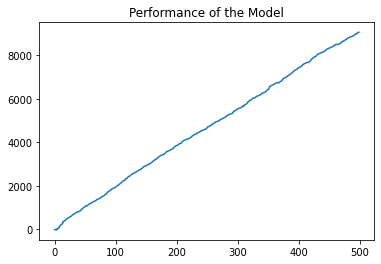

In [22]:
plt.plot(performance) 
plt.title('Performance of the Model')
plt.show()

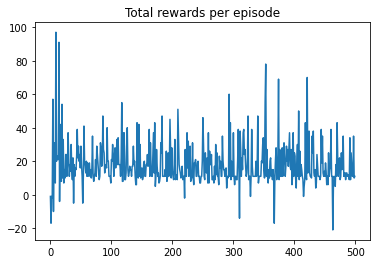

In [23]:
plt.plot(reward_per_episode) 
plt.title('Total rewards per episode')
plt.show()

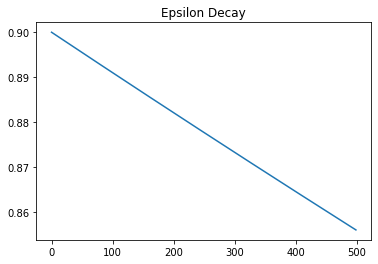

In [24]:
plt.plot(epsilon_arr) 
plt.title('Epsilon Decay')
plt.show()

In [25]:
performance_list.append(performance)
reward_per_episode_list.append(reward_per_episode)
epsilon_arr_list.append(epsilon_arr)

## 2) No of Episodes = 5000, Epsilon Decay Rate = 0.9999

In [26]:
qvalues = np.zeros((5,5,4))
episodes = 5000
episode_count = 0;
epsilon = 0.9
discount_factor = 0.9
learning_rate = 0.01
decay = 0.9999
min_epsilon = 0.1

def greedy(cur_row, cur_col, epsilon):
    if np.random.random() < epsilon:
        return np.argmax(qvalues[cur_row, cur_col])
    else:
        return np.random.randint(4)

final_reward = 0
epsilon_arr = list()
reward_per_episode = list()
performance = list()

done = False
reward = 0 

for e in range(episodes):    
    env.reset()
    row, col = [0,0]
    total_rewards = 0
    while (done == False or env.timestep < env.max_timesteps):
        # clear_output(wait=True)
        # env.render()
        # print(done, e)
        # plt.show()
        # time.sleep(0.01)

        old_action = greedy(row, col, epsilon)
        old_row, old_col = row, col
        new_row, new_col = env.initial
        next_state, reward, done, _ = env.step(old_action)
        new_action = greedy(new_row, new_col, epsilon)

        new_q = qvalues[old_row, old_col, old_action] + learning_rate * (reward + (discount_factor * qvalues[new_row, new_col, new_action]) - qvalues[old_row, old_col, old_action])
        qvalues[old_row, old_col, old_action] = new_q
        
        if done:
            epsilon = max(min_epsilon, epsilon * decay)
            epsilon_arr.append(epsilon)
            break
        row, col = new_row, new_col
        total_rewards += reward

    episode_count += 1
    final_reward += total_rewards
    reward_per_episode.append(total_rewards)
    performance.append(final_reward)
    
# clear_output(wait=True)
# env.render()
# print(done, episodes)
# plt.show()
print("Total Rewards - ", final_reward)
print("Performance - Total Rewards/Number of Episodes",(final_reward/episodes))

Total Rewards -  1113929
Performance - Total Rewards/Number of Episodes 222.7858


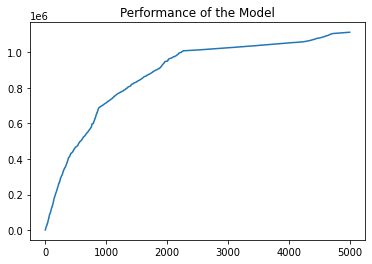

In [27]:
plt.plot(performance) 
plt.title('Performance of the Model')
plt.show()

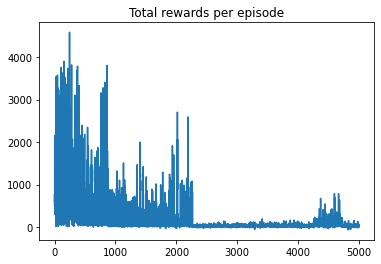

In [28]:
plt.plot(reward_per_episode) 
plt.title('Total rewards per episode')
plt.show()

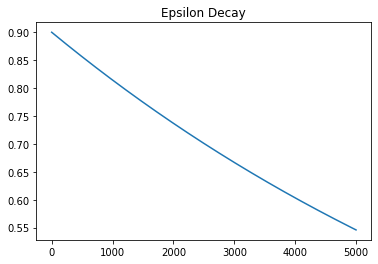

In [29]:
plt.plot(epsilon_arr) 
plt.title('Epsilon Decay')
plt.show()

In [30]:
performance_list.append(performance)
reward_per_episode_list.append(reward_per_episode)
epsilon_arr_list.append(epsilon_arr)

## 3) No of Episodes = 50, Epsilon Decay Rate = 0.9

In [31]:
qvalues = np.zeros((5,5,4))
episodes = 50
episode_count = 0;
epsilon = 0.9
discount_factor = 0.9
learning_rate = 0.01
decay = 0.9
min_epsilon = 0.1

def greedy(cur_row, cur_col, epsilon):
    if np.random.random() < epsilon:
        return np.argmax(qvalues[cur_row, cur_col])
    else:
        return np.random.randint(4)

final_reward = 0
epsilon_arr = list()
reward_per_episode = list()
performance = list()

done = False
reward = 0 

for e in range(episodes):    
    env.reset()
    row, col = [0,0]
    total_rewards = 0
    while (done == False or env.timestep < env.max_timesteps):
        # clear_output(wait=True)
        # env.render()
        # print(done, e)
        # plt.show()
        # time.sleep(0.01)

        old_action = greedy(row, col, epsilon)
        old_row, old_col = row, col
        new_row, new_col = env.initial
        next_state, reward, done, _ = env.step(old_action)
        new_action = greedy(new_row, new_col, epsilon)

        new_q = qvalues[old_row, old_col, old_action] + learning_rate * (reward + (discount_factor * qvalues[new_row, new_col, new_action]) - qvalues[old_row, old_col, old_action])
        qvalues[old_row, old_col, old_action] = new_q
        
        if done:
            epsilon = max(min_epsilon, epsilon * decay)
            epsilon_arr.append(epsilon)
            break
        row, col = new_row, new_col
        total_rewards += reward

    episode_count += 1
    final_reward += total_rewards
    reward_per_episode.append(total_rewards)
    performance.append(final_reward)
    
# clear_output(wait=True)
# env.render()
# print(done, episodes)
# plt.show()
print("Total Rewards - ", final_reward)
print("Performance - Total Rewards/Number of Episodes",(final_reward/episodes))

Total Rewards -  1211
Performance - Total Rewards/Number of Episodes 24.22


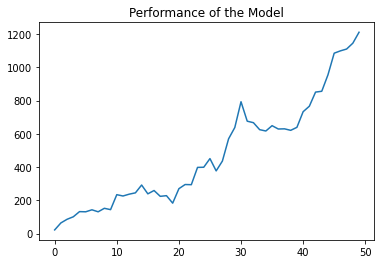

In [32]:
plt.plot(performance) 
plt.title('Performance of the Model')
plt.show()

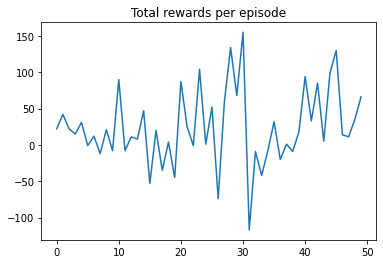

In [33]:
plt.plot(reward_per_episode) 
plt.title('Total rewards per episode')
plt.show()

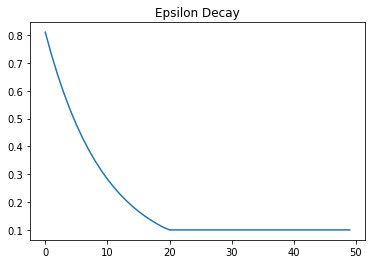

In [34]:
plt.plot(epsilon_arr) 
plt.title('Epsilon Decay')
plt.show()

In [35]:
performance_list.append(performance)
reward_per_episode_list.append(reward_per_episode)
epsilon_arr_list.append(epsilon_arr)

## 4) No of Episodes = 50, Epsilon Decay Rate = 0.8

In [36]:
qvalues = np.zeros((5,5,4))
episodes = 50
episode_count = 0;
epsilon = 0.9
discount_factor = 0.9
learning_rate = 0.01
decay = 0.8
min_epsilon = 0.1

def greedy(cur_row, cur_col, epsilon):
    if np.random.random() < epsilon:
        return np.argmax(qvalues[cur_row, cur_col])
    else:
        return np.random.randint(4)

final_reward = 0
epsilon_arr = list()
reward_per_episode = list()
performance = list()

done = False
reward = 0 

for e in range(episodes):    
    env.reset()
    row, col = [0,0]
    total_rewards = 0
    while (done == False or env.timestep < env.max_timesteps):
        # clear_output(wait=True)
        # env.render()
        # print(done, e)
        # plt.show()
        # time.sleep(0.01)

        old_action = greedy(row, col, epsilon)
        old_row, old_col = row, col
        new_row, new_col = env.initial
        next_state, reward, done, _ = env.step(old_action)
        new_action = greedy(new_row, new_col, epsilon)

        new_q = qvalues[old_row, old_col, old_action] + learning_rate * (reward + (discount_factor * qvalues[new_row, new_col, new_action]) - qvalues[old_row, old_col, old_action])
        qvalues[old_row, old_col, old_action] = new_q
        
        if done:
            epsilon = max(min_epsilon, epsilon * decay)
            epsilon_arr.append(epsilon)
            break
        row, col = new_row, new_col
        total_rewards += reward

    episode_count += 1
    final_reward += total_rewards
    reward_per_episode.append(total_rewards)
    performance.append(final_reward)
    
# clear_output(wait=True)
# env.render()
# print(done, episodes)
# plt.show()
print("Total Rewards - ", final_reward)
print("Performance - Total Rewards/Number of Episodes",(final_reward/episodes))

Total Rewards -  806
Performance - Total Rewards/Number of Episodes 16.12


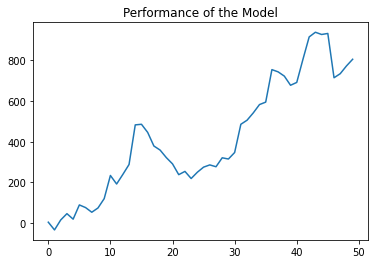

In [37]:
plt.plot(performance) 
plt.title('Performance of the Model')
plt.show()

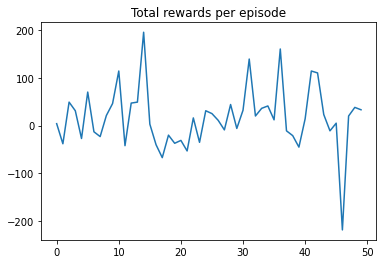

In [38]:
plt.plot(reward_per_episode) 
plt.title('Total rewards per episode')
plt.show()

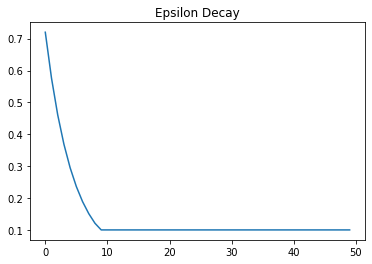

In [39]:
plt.plot(epsilon_arr) 
plt.title('Epsilon Decay')
plt.show()

In [40]:
performance_list.append(performance)
reward_per_episode_list.append(reward_per_episode)
epsilon_arr_list.append(epsilon_arr)

## Graph plots for all 6 setups

In [47]:
episode_list = [50, 500, 5000, 50, 50]
decay_list = [0.9999, 0.9999, 0.9999, 0.9, 0.8]

### Performance:

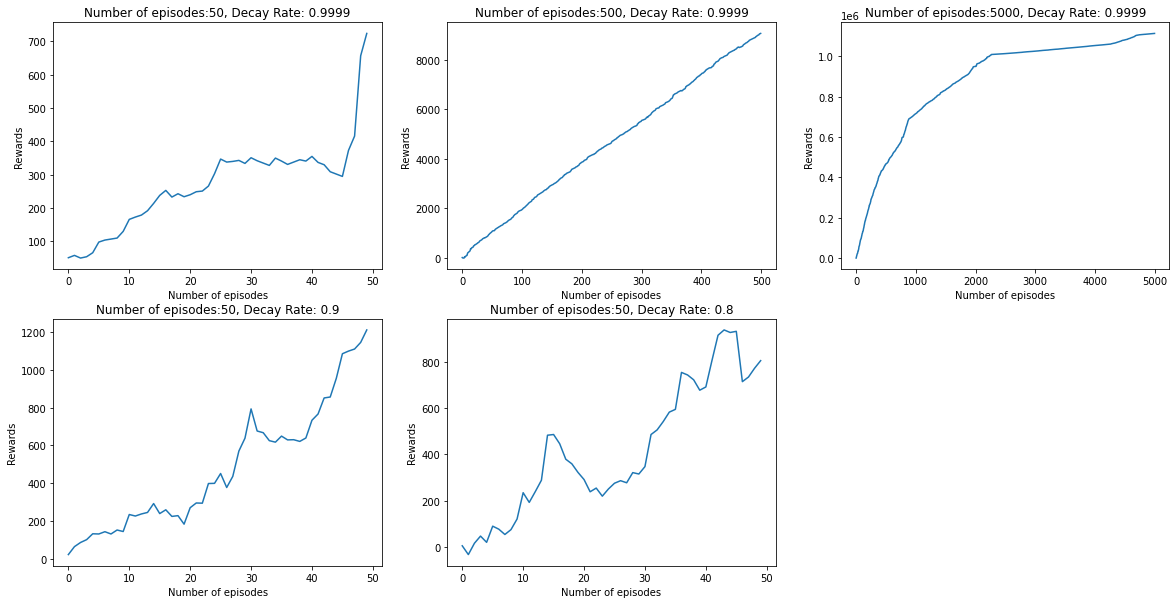

In [54]:
plt.figure(figsize=(20,10))
for i in range(0, len(performance_list)):
    plt.subplot(2,3,i+1)
    plt.title('Number of episodes:' + str(episode_list[i]) + ', ' + 'Decay Rate: ' + str(decay_list[i]))
    plt.xlabel('Number of episodes')
    plt.ylabel('Rewards')
    plt.plot(performance_list[i])
plt.show()

### Rewards per episode:

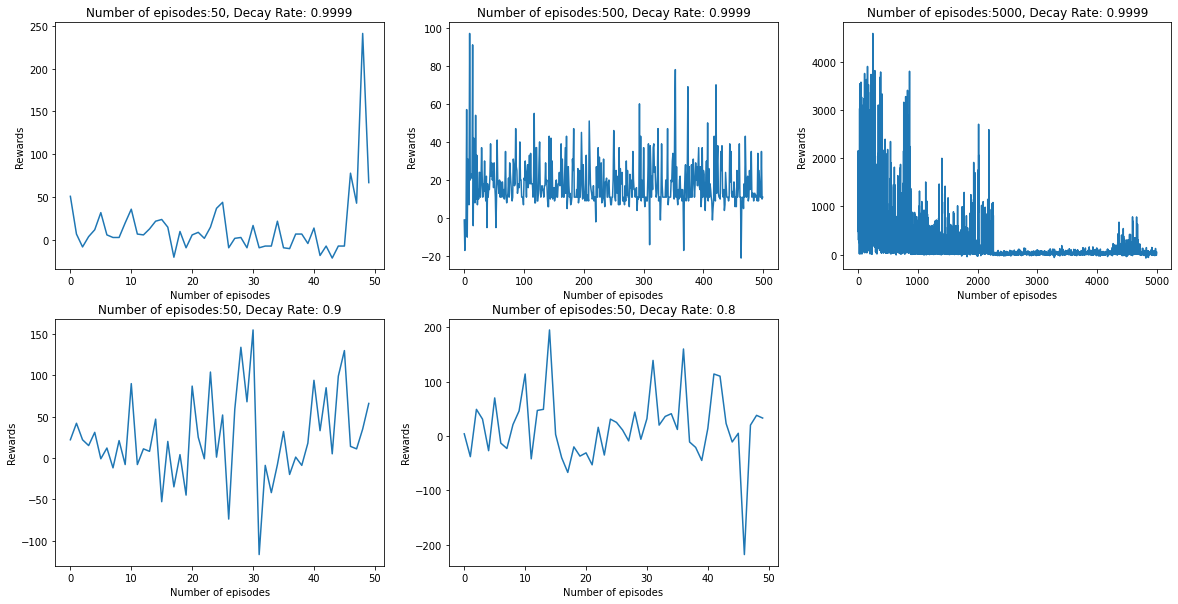

In [56]:
plt.figure(figsize=(20,10))
for i in range(0, len(reward_per_episode_list)):
    plt.subplot(2,3,i+1)
    plt.title('Number of episodes:' + str(episode_list[i]) + ', ' + 'Decay Rate: ' + str(decay_list[i]))
    plt.xlabel('Number of episodes')
    plt.ylabel('Rewards')
    plt.plot(reward_per_episode_list[i])
plt.show()

### Decay Rate:

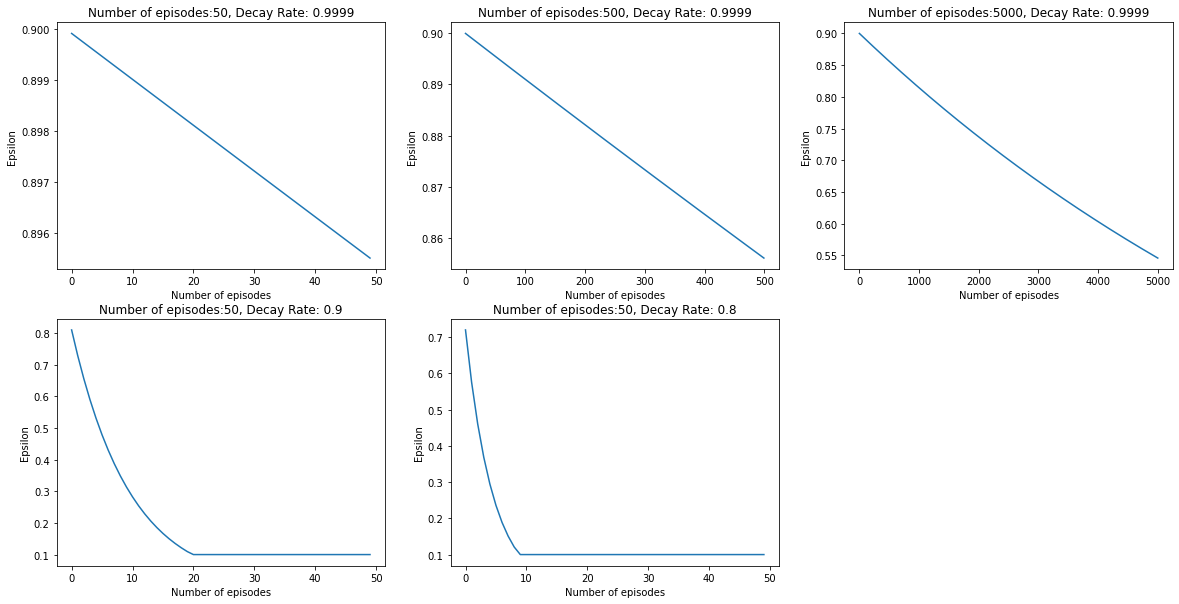

In [59]:
plt.figure(figsize=(20,10))
for i in range(0, len(epsilon_arr_list)):
    plt.subplot(2,3,i+1)
    plt.title('Number of episodes:' + str(episode_list[i]) + ', ' + 'Decay Rate: ' + str(decay_list[i]))
    plt.xlabel('Number of episodes')
    plt.ylabel('Epsilon')
    plt.plot(epsilon_arr_list[i])
plt.show()

# Bonus: Double Q-Learning